In [13]:
from loguru import logger
import unittest
import os.path as op
from pathlib import Path
from nose.plugins.attrib import attr

path_to_script =  Path("~/projects/scaffan/").expanduser()

print(path_to_script.exists())
#pwd() # op.dirname(op.abspath(__file__))

import sys

# sys.path.insert(0, op.abspath(op.join(path_to_script, "../../io3d")))
# sys.path.insert(0, op.abspath(op.join(path_to_script, "../../imma")))
sys.path.insert(0,str(path_to_script))
# import sys
# import os.path

# imcut_path =  os.path.join(path_to_script, "../../imcut/")
# sys.path.insert(0, imcut_path)

import glob
import os
import numpy as np
import matplotlib.pyplot as plt

skip_on_local = False

import scaffan.image as scim
scim.import_openslide()
import openslide

import io3d
import scaffan
import scaffan.image as scim

True
Trying to download openslide dll files in ~\Downloads\openslide-win64-20171122\bin
add path ~\Downloads\openslide-win64-20171122\bin
Trying to download openslide dll files in ~\Downloads\openslide-win64-20171122\bin


2019-07-08 18:40:52.910 | DEBUG    | scaffan.image:__init__:164 - Reading file /home/mjirik/data/medical/orig/medical/orig/CMU-1.ndpi
2019-07-08 18:40:52.916 | DEBUG    | scaffan.image:__init__:178 - Reading the annotation


~\Downloads\openslide-win64-20171122\bin;~\Downloads\openslide-win64-20171122\bin;/home/mjirik/miniconda/envs/scaffan/bin:/home/mjirik/miniconda/condabin:/home/mjirik/miniconda/bin:/home/mjirik/bin:/home/mjirik/miniconda/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/usr/games


2019-07-08 18:40:53.211 | DEBUG    | scaffan.image:get_region_image:705 - imcr dtype: uint8, shape: (786, 1839, 4), min max: [0, 231], mean: 1.764142615399729, min max alpha: [0, 64], mean: 0.13920609026644915
2019-07-08 18:40:53.346 | DEBUG    | scaffan.image:get_region_image:705 - imcr dtype: uint8, shape: (39, 91, 4), min max: [0, 255], mean: 119.84239691932, min max alpha: [30, 151], mean: 32.91575091575091
2019-07-08 18:40:53.349 | DEBUG    | __main__:<module>:14 - Annotation ID: [12], location view1 [ 3763 19040], view2 [ 5999 20004]
2019-07-08 18:40:53.365 | DEBUG    | __main__:logim:23 - image1 dtype: uint8, shape: (287, 672, 4), min max: [0, 94], mean: 0.8932529312538023, min max alpha: [0, 28], mean: 0.13988095238095238
2019-07-08 18:40:53.366 | DEBUG    | __main__:logim:23 - image2 dtype: uint8, shape: (12, 27, 4), min max: [66, 170], mean: 118.30658436213992, min max alpha: [30, 60], mean: 32.324074074074076
2019-07-08 18:40:53.371 | DEBUG    | __main__:logim:23 - merged dt

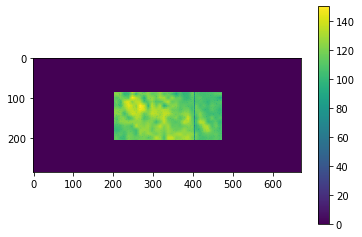

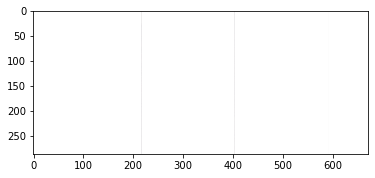

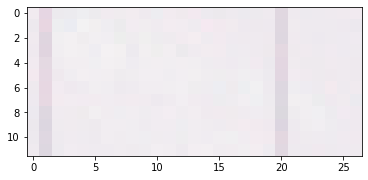

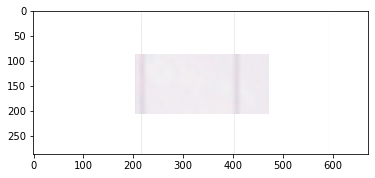

In [15]:
fn = io3d.datasets.join_path("medical", "orig", "CMU-1.ndpi", get_root=True)
anim = scim.AnnotatedImage(fn)
annotation_ids = anim.select_annotations_by_title("obj1")
view1 = anim.get_views(annotation_ids, margin=1.0, pixelsize_mm=[0.005, 0.005])[0]
image1 = view1.get_region_image()
# plt.imshow(image1)
# plt.colorbar()
# plt.show()

view2 = anim.get_views(annotation_ids, margin=0.1, pixelsize_mm=[0.05, 0.05])[0]
image2 = view2.get_region_image()
# plt.imshow(image2)
# plt.show()
logger.debug(f"Annotation ID: {annotation_ids}, location view1 {view1.region_location}, view2 {view2.region_location}")

merged = view1.insert_image_from_view(view2, image1, image2)
# plt.imshow(merged)
# plt.show()
diffim = image1[:, :, :3].astype(np.int16) - merged[:, :, :3].astype(np.int16)
errimg = np.mean(np.abs(diffim), 2)
def logim(image1, text):
    if len(image1.shape) == 3 and image1.shape[2] == 4:
        logger.debug(f"{text} dtype: {image1.dtype}, shape: {image1.shape}, min max: [{np.min(image1[:,:,:3])}, {np.max(image1[:,:,:3])}], mean: {np.mean(image1[:,:,:3])}, min max alpha: [{np.min(image1[:,:,3])}, {np.max(image1[:,:,3])}], mean: {np.mean(image1[:,:,3])}")
    else:
        logger.debug(f"{text} dtype: {image1.dtype}, shape: {image1.shape}, min max: [{np.min(image1[:,:])}, {np.max(image1[:,:])}], mean: {np.mean(image1[:,:])}")

# logim(image1_copy, "image1_copy")
logim(image1, "image1")
logim(image2, "image2")
logim(merged, "merged")
logim(diffim, "diffim")
logim(errimg, "errimg")

# logger.debug(f"image2 dtype: {image2.dtype}, shape: {image2.shape}, min max: [{np.min(image2[:,:,:3])}, {np.max(image2[:,:,:3])}], mean: {np.mean(image2[:,:,:3])}, min max alpha: [{np.min(image2[:,:,3])}, {np.max(image2[:,:,3])}], mean: {np.mean(image2[:,:,3])}")
# logger.debug(f"merged dtype: {merged.dtype}, shape: {merged.shape}, min max: [{np.min(merged[:,:,:3])}, {np.max(merged[:,:,:3])}], mean: {np.mean(merged[:,:,:3])}, min max alpha: [{np.min(merged[:,:,3])}, {np.max(merged[:,:,3])}], mean: {np.mean(merged[:,:,3])}")
# logger.debug(f"errimg dtype: {errimg.dtype}, shape: {errimg.shape}, min max: [{np.min(errimg)}, {np.max(errim)}], mean: {np.mean(errim)}")
plt.figure()
plt.imshow(errimg)
plt.colorbar()
plt.savefig("errimg.png")

plt.figure()
plt.imshow(image1)
plt.savefig("image1.png")

plt.figure()
plt.imshow(image2)
plt.savefig("image2.png")

plt.figure()
plt.imshow(merged)
plt.savefig("merged.png")

err = np.mean(errimg)
# self.assertLess(err, 3, "Mean error in intensity levels per pixel should be low")
# self.assertLess(1, err, "Mean error in intensity levels per pixel should be low but there should be some error.")

In [22]:
view1.anim.openslide.dimensions

(51200, 38144)